# Decision Tree

Decision tree algorithm is one the of the most versatile algorithm in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex dataset. Apart from that it is very to  easy understand and read. That makes it more powerful to use. When coupled with esembeled techniques- which we will learn very soon-it performs ven better. As the name suggest this algorithm works by dividing the whole dataset into a tree like structure base on some rules and conditions and gives prediction based on those conditions.

**Tree Pruning:**
Tree pruning is the method of trimning down a full tree to reduce complexity and variance n the data. Just as we regularized linear regression. we can regularize descision tree model by adding new term. 




**Post-Pruning:**
Post-pruning also known as backward pruning, is the process where decision tree algorithm is generated first and then the non-significant branches are removed. Cross Validation set of data is used to check the effect pruning and test whether expanding a node will make an improvement or not. If any improvement s there then we continue by expanding that node else if there is reduction in accuracy then the node not be expanded and should be converted into leaf node





**Pre-Pruning:**
Pre-pruning is also known as forward pruning, stops the non-significant branches from generating. It uses a condition to decide when should it terminate splliting of some of the branches prematurely as the tree is genereated.




**Classification Trees:**
Regression trees are used for quatitative data. In case of qualitative data or categorical data, we use classification tree, it is done using classification error rate. Gini impurity and entropy. Let's understand these terms in details.



 
**Entropy:**
Entropy is the measure of randomness in the data.In other words, it gives the impurity present in the dataset. 



**Gini Impurity:**
Gini impurity is a measure of how a randomly chosen element the set would be incorrectly labelled if it was randomly labelled acccording to distribution of lables in the subset.

Gini impurity values lies between 0 and 1. 0 being no impurity and 1 denoting random distribution. The node of which the Ginni impurity is least is selected as the root node to split. 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data= pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [5]:
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,High,7
585,7.6,0.510,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6,Medium,6
263,7.9,0.370,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,Low,5
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,Medium,6
1463,6.9,0.630,0.01,2.4,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,Medium,6
592,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,Medium,5
54,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,Medium,6
1273,7.5,0.580,0.20,2.0,0.073,34.0,44.0,0.99494,3.10,0.43,9.3,Low,5
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,Medium,5
121,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,Medium,6


In [7]:
data.shape

(1599, 13)

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

**As we have categorical (Alcohol_Content), we need to convert into numeric data using encoding method.**

Content is following some order like Low,Medium and high. We need to give weight according to order

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
ord_encoder = OrdinalEncoder(categories=[['Low','Medium', 'High']]) #Model just understand just 0 and 1 so we will encode accordingle ordinal emcoding technique will use because it is order give values accordingle low=0, medium=1 and high =2
df1= ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [14]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [16]:
data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# Plotting heatmap (Correlationmatrix)

let's try to see if we can reduce the features usinf different techniques
let's lt heatmap to visualize and find coefficent of multicolinearity

<Axes: >

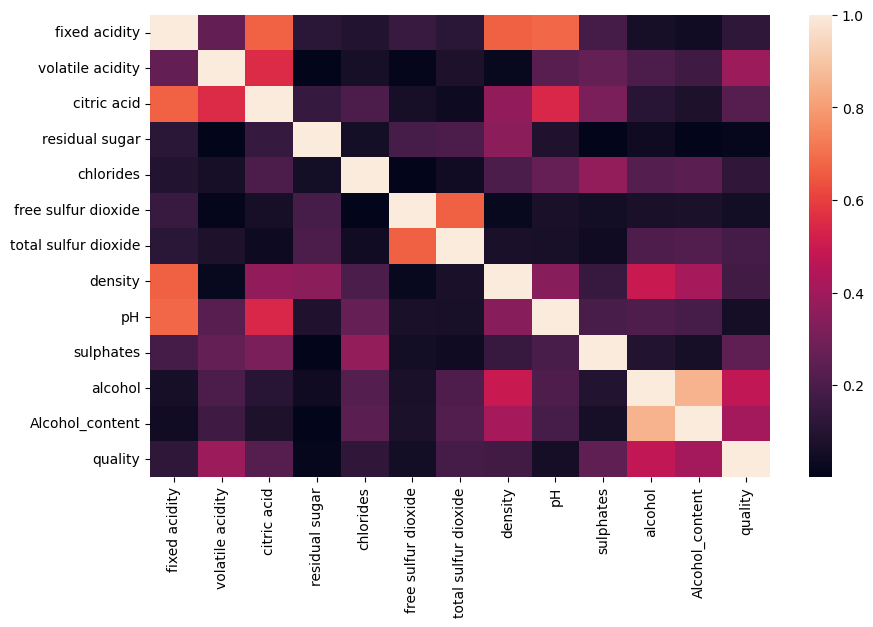

In [28]:
df_corr= data.corr().abs()


plt.figure(figsize=(10,6))
sns.heatmap(df_corr)
#plt.show()

seems like Alcohol_content and alcohol are corelated as per above heat map. But we need more proof.


**Make sure they are really corelated (It should follow some trend)**

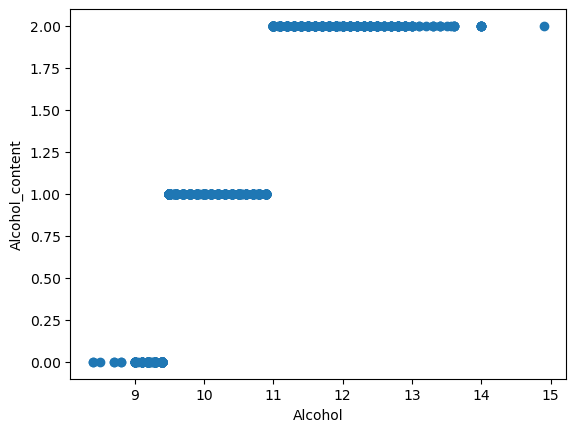

In [29]:
plt.scatter(data.alcohol, data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.show()

we see clear trend. As and when Alcohol increase and its content also increase so delete on e of them.

In [30]:
X= data.drop(columns=['quality', 'Alcohol_content'])
y= data['quality']

In [31]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=41)

In [46]:
# Write one function and call as many times to check accuracy_scores of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        
        print("\n=================Train Result====================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
        
    elif train==False:
        pred= clf.predict(x_test)
            
            
        print("\n=================TestResult==================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
            
            
        print("\n \n Test Classification report \n", classification_report(y_test, pred,digits=2))

In [38]:
#Model initiation
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True) #This is for training score

metric_score(clf, x_train, x_test, y_train, y_test, train= False)#This is for testing score


=================Train Result====================
Accuracy Score: 100.00%

=================TestResult==================
Accuracy Score: 64.75%

 
 Test Classification report 
               precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.11      0.09      0.10        11
           5       0.70      0.71      0.70       157
           6       0.69      0.66      0.67       168
           7       0.55      0.58      0.56        57
           8       0.17      0.25      0.20         4

    accuracy                           0.65       400
   macro avg       0.45      0.44      0.44       400
weighted avg       0.65      0.65      0.65       400



**Let's understand confusion metrix for multi class**

In [48]:
#Prediction for confusion metrix
y_pred= clf.predict(x_test)


#create confusion matrix 
confusion_matrix(y_test, y_pred)


array([[  1,   1,   1,   0,   0,   0],
       [  1,   1,   6,   3,   0,   0],
       [  0,   4, 112,  34,   7,   0],
       [  0,   3,  33, 111,  18,   3],
       [  0,   0,   8,  14,  33,   2],
       [  0,   0,   1,   0,   2,   1]])

In [53]:
# We are tuning four important parameter right now, we are passing the different values for both parameter
grid_param={
    'criterion':['gini', 'entropy'],
    'max_depth' : range(0,15),  #The maximum depth of tree
    'min_samples_leaf': range(2,6), # The min no of samples required to be at the leaf node
    'min_samples_split': range(3,8), # The min no of samples required to plit at internal node
    'max_leaf_nodes': range(5,15) #If none then unlimited no of leaf nodes
    
}

In [56]:
grid_search= GridSearchCV(estimator= clf, 
                          param_grid= grid_param, 
                          cv=5
                          ) 

In [57]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [59]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [60]:
clf= DecisionTreeClassifier(criterion= 'entropy', min_samples_split=4, max_depth=11, min_samples_leaf=2)


clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=4)

In [61]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True) #This is for training score

metric_score(clf, x_train, x_test, y_train, y_test, train= False)#This is for testing score


=================Train Result====================
Accuracy Score: 90.24%

=================TestResult==================
Accuracy Score: 57.00%

 
 Test Classification report 
               precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.10      0.18      0.12        11
           5       0.62      0.68      0.64       157
           6       0.62      0.54      0.58       168
           7       0.54      0.47      0.50        57
           8       0.25      0.25      0.25         4

    accuracy                           0.57       400
   macro avg       0.38      0.41      0.38       400
weighted avg       0.59      0.57      0.58       400



In [62]:
#Prediction for confusion metrix
y_pred= clf.predict(x_test)


#create confusion matrix 
confusion_matrix(y_test, y_pred)


array([[  1,   0,   2,   0,   0,   0],
       [  2,   2,   6,   1,   0,   0],
       [  4,  11, 106,  32,   3,   1],
       [  0,   6,  52,  91,  18,   1],
       [  0,   2,   6,  21,  27,   1],
       [  0,   0,   0,   1,   2,   1]])